In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pylab

In [16]:
centers =[[1,1], [-1, -1], [1, -1]]


In [17]:
x, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

In [18]:
x = StandardScaler().fit_transform(x)

In [19]:
xx, yy = zip(*x)

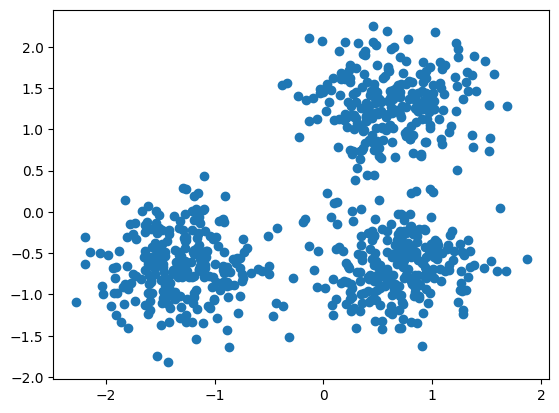

In [20]:
plt.scatter(xx,yy)

## Set up DBSCAN

In [23]:
# eps -> Epsilion -> okolica/odleglosc punktu
# min_samples -> MinPts -> minimum punktów wokół obecnego punktu 
# dla spełnienia warunków bliskośći
db = DBSCAN(eps=0.3, min_samples=10).fit(x)

In [26]:
core_samples = db.core_sample_indices_

In [28]:
# zeros_like -> Return an array of zeros with the same shape and type as a given array
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

In [29]:
core_samples_mask[db.core_sample_indices_] = True

In [33]:
# number of clusters
labels = db.labels_

# if the label equals “-1”, this means the data record is an outlier.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [34]:
n_clusters_

3

In [35]:
# find the outliers -> points beyoud the eps neighbourhood of core points
outliers = x[labels == -1]
outliers

array([[-1.4302079 , -1.82380068],
       [-0.13447918,  2.11039748],
       [ 1.22425496,  0.50161091],
       [ 1.53624088,  0.89460489],
       [ 1.68745105,  1.27830756],
       [-1.53199232, -1.74146844],
       [-0.42227599, -0.19034456],
       [ 1.52307352,  0.74115752],
       [-0.46307453, -1.26531795],
       [ 1.62198217,  0.05020132],
       [ 1.01170962,  0.24102378],
       [-0.43185167, -1.10093485],
       [-0.3164503 , -1.51218921],
       [-2.19229513, -0.30228576],
       [ 0.9807011 ,  0.27373202],
       [-0.86338803, -1.63431796],
       [ 1.87043803, -0.56476419],
       [-0.37447929, -1.13624183]])

## Get the contents of clusters

In [40]:
cluster1 = x[labels==0]

In [41]:
cluster2 = x[labels==1]

In [42]:
cluster3 = x[labels==2]

## Plot the resuts with specific colors, black for noise

In [43]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

In [44]:
colors = ['y', 'b', 'g', 'r']

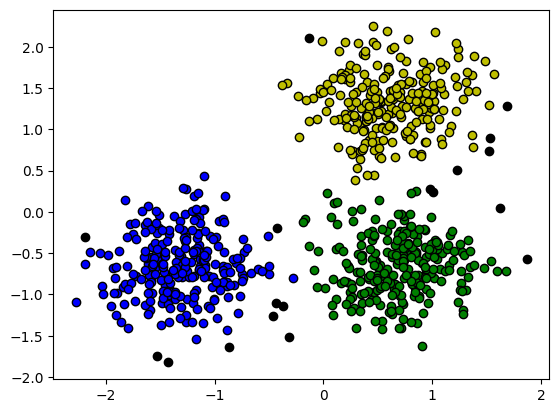

In [49]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'
 
    class_member_mask = (labels == k)
 
    xy = x[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                  markeredgecolor='k',
                  markersize=6)
 
    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                  markeredgecolor='k',
                  markersize=6)
 